In [1]:
%load_ext autoreload
%autoreload 2
import os; import sys;sys.path.append("..")
import socceraction.spadl.opta as opta
import socceraction.spadl.spadl as spadl
import ujson
import pandas as pd
import numpy as np
import tqdm

In [2]:
spadl.convert_optah5("../data/opta.h5","../data/spadl.h5")

/home/tomd/software/miniconda3/envs/soccer/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tomd/software/miniconda3/envs/soccer/lib/python3.7/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['team_abbr', 'team_name', 'team_short']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
  0%|          | 0/45 [00:00<?, ?it/s]/home/tomd/software/miniconda3/envs/soccer/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  s

In [99]:
games = pd.read_hdf("../data/spadl.h5","games")
games

,attendance,away_team_id,competition_id,duration,game_date,game_id,home_team_id,matchday,referee_id,season_id,venue_id
37,45517,175,23,96,2017-12-10 15:15:00,942948,185,15,42055,2017,2476
43,11767,140,24,94,2017-08-06 15:00:00,920528,2128,1,42021,2017,3400
21,12000,413,112,95,2017-08-11 18:30:00,917587,2052,3,43824,2017,3312
0,19279,135,21,95,2016-12-04 14:00:00,879320,603,15,40448,2016,2698
41,45000,162,22,94,2016-09-24 13:30:00,861434,159,5,18519,2016,1370
18,24000,161,22,93,2016-09-20 18:00:00,861424,160,4,17346,2016,2838
42,47500,320,9,92,2017-01-29 15:45:00,855735,198,20,39627,2016,114
7,11450,318,9,95,2016-12-16 19:00:00,855700,207,17,42076,2016,131
30,10800,207,9,94,2016-09-25 10:30:00,855615,320,7,42024,2016,119
8,59955,90,8,99,2017-01-22 14:15:00,855383,3,22,40936,2016,3250


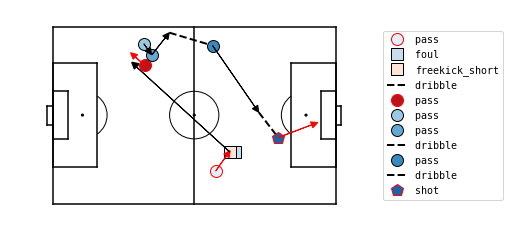

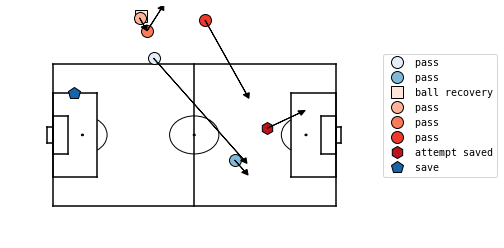

In [147]:
actions = pd.read_hdf("../data/spadl.h5","actions/game_942948")
actions = actions[5:15]
actions = spadl.add_dribbles(actions)
actiontypes = pd.read_hdf("../data/spadl.h5","actiontypes")
actions = actions.merge(actiontypes,sort=False)
actions = actions.sort_values("time_seconds")

location = actions[["start_x","start_y","end_x","end_y"]]
import matplotsoccer as mps

mps.actions(location=location,action_type = actions.type_name,team=actions.team_id,result=actions.result_id)

events = pd.read_hdf("../data/opta.h5","events/game_942948")
events = events[20:28]
eventtypes = pd.read_hdf("../data/opta.h5","eventtypes")
events = events.merge(eventtypes)
events = events.sort_values("timestamp")

location = events[["start_x","start_y","end_x","end_y"]]

mps.actions(location=location,action_type = events.type_name,team=events.team_id)